In [1]:
import pandas as pd
# URL of the CSV file on GitHub
url = "https://raw.githubusercontent.com/GDG-IGDTUW/AI-ML-1/main/IPL%20Score%20Prediction/ipl.csv"
df = pd.read_csv(url)
print(df.head())

   mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222 

In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np

In [3]:
# Loading the dataset
df = pd.read_csv(url)

In [ ]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [ ]:
df.shape

(76014, 15)

In [ ]:
df.dtypes

,0
mid,int64
date,object
venue,object
bat_team,object
bowl_team,object
batsman,object
bowler,object
runs,int64
wickets,int64
overs,float64


In [ ]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [6]:
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [ ]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [ ]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [ ]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [7]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [8]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [9]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [10]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [11]:
# ISSUE 1: Removing the first 5 overs data in every match and display the modified data
new_data = df[df['overs'].apply(lambda x: int(x)) >= 5]
print(new_data)

             date               bat_team                    bowl_team  runs  \
32     2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
33     2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
34     2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
35     2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
36     2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
...           ...                    ...                          ...   ...   
75884  2017-05-19  Kolkata Knight Riders               Mumbai Indians   106   
75885  2017-05-19  Kolkata Knight Riders               Mumbai Indians   107   
75886  2017-05-19  Kolkata Knight Riders               Mumbai Indians   107   
75887  2017-05-19  Kolkata Knight Riders               Mumbai Indians   107   
75888  2017-05-19  Kolkata Knight Riders               Mumbai Indians   107   

       wickets  overs  runs_last_5  wickets_last_5 

In [12]:
# ISSUE 2:  Converting the column 'date' from string into datetime object.
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes) #check the datatype after conversion

date              datetime64[ns]
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object


In [13]:
# ISSUE 3: Handle Outliers in Data Preprocessing.

# Defining a function to remove outliers using IQR :
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Applying outlier removal to numeric columns :
for col in df.select_dtypes(exclude=['object']).columns:
    df = remove_outliers_iqr(df, col)


In [14]:
# ISSUE 4: Add Feature Scaling to Numerical Columns.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_cols = ['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker', 'total']

# Initialize scaler
scaler = StandardScaler()  # You can also use MinMaxScaler() for normalization

# Apply scaling to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# print the result
df.head()

KeyError: "['striker', 'non-striker'] not in index"

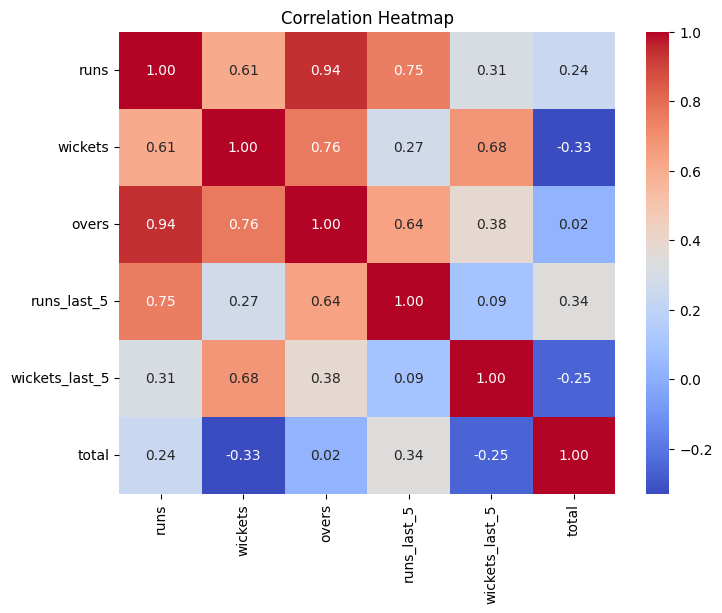

In [15]:
# ISSUE 5: Generate a Heatmap for Feature Correlations.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']

# Compute correlation
correlation_matrix = df[numerical_cols].corr()


# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [16]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [ ]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,1,0,0.1,1,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2008-04-18,1,0,0.2,1,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2008-04-18,2,0,0.2,2,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2008-04-18,2,0,0.3,2,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2008-04-18,2,0,0.4,2,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [17]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [18]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (48961, 21) and Test set: (3574, 21)


In [19]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)

In [21]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.94294804871357
Mean Squared Error (MSE): 329.4908464055147
Root Mean Squared Error (RMSE): 18.151882723439865


In [ ]:
# ISSUE 6: Apply Decision Tree Regression Model

In [22]:
# ISSUE 7: Apply Random Forest Regression Model

# Importing the required library :
from sklearn.ensemble import RandomForestRegressor

# Implementing the Random Forest Regression Model :
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

# Predicting results using the model :
y_pred_rf = random_regressor.predict(X_test)

# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))


---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 16.73100831969434
Mean Squared Error (MSE): 499.66780547278216
Root Mean Squared Error (RMSE): 22.353250445355417


In [ ]:
# ISSUE 8: Apply AdaBoost Model using Linear Regression as the base learner

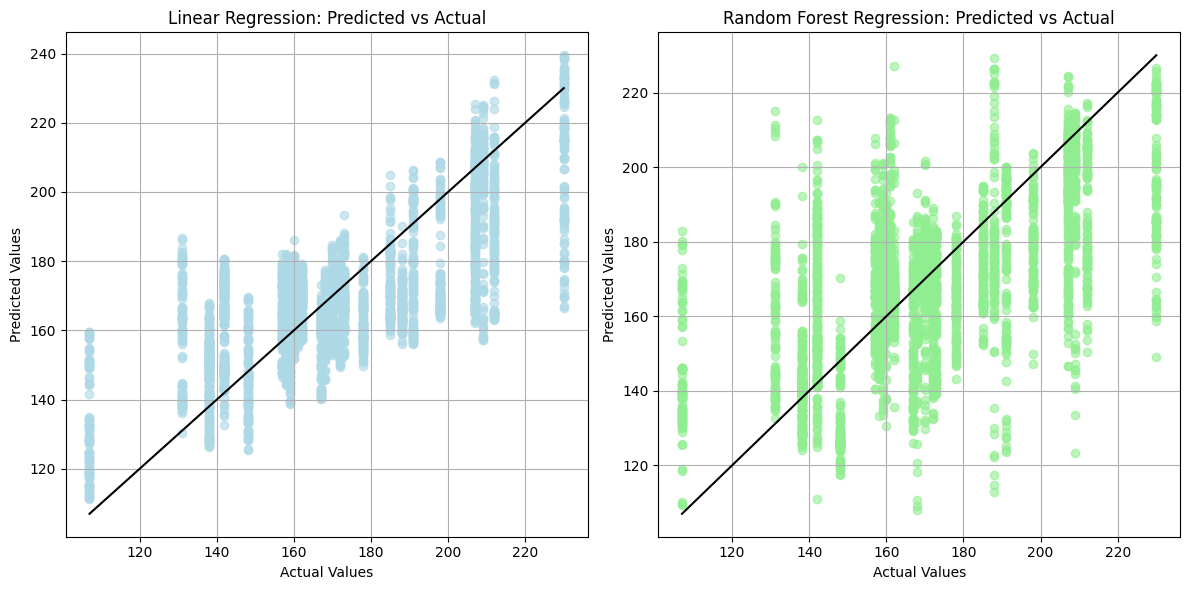

In [24]:
# ISSUE 9: Plot Predicted vs Actual Runs: No comparison plot for predictions and actual values.

import matplotlib.pyplot as plt
import numpy as np

# Plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for Linear Regression
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='lightblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Plot for Random Forest Regression
plt.subplot(1, 2, 2)  # Subplot for Random Forest
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='lightgreen')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black')
plt.title('Random Forest Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# ISSUE 10: Analyze Trends in Runs Over Time: The code doesn’t analyze scoring trends.